In [1]:
!pip install albumentations

In [2]:
%matplotlib inline

import random
import albumentations as A
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import cv2

In [3]:
def plot_img(img):
    img = img.copy()
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [4]:
image = cv2.imread("/data/B4/.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

[ WARN:0@0.557] global loadsave.cpp:248 findDecoder imread_('/data/B4/.JPG'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
# Define an augmentation pipeline
transform = A.Compose(
    [A.HorizontalFlip(p=1),
     A.RandomBrightnessContrast(p=1),
    A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3)]
    #bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']),
)

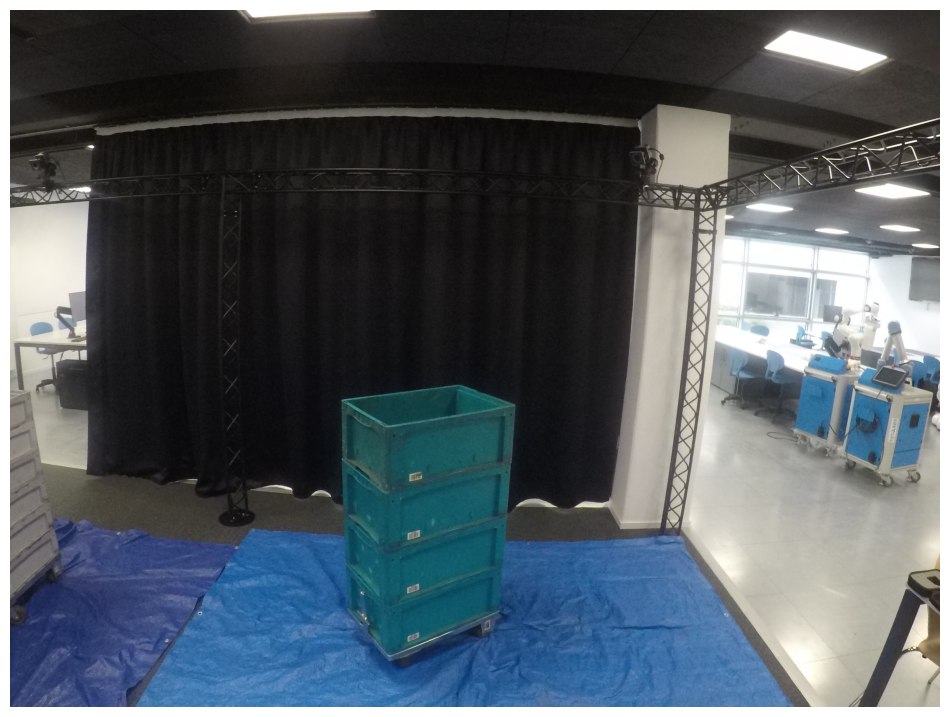

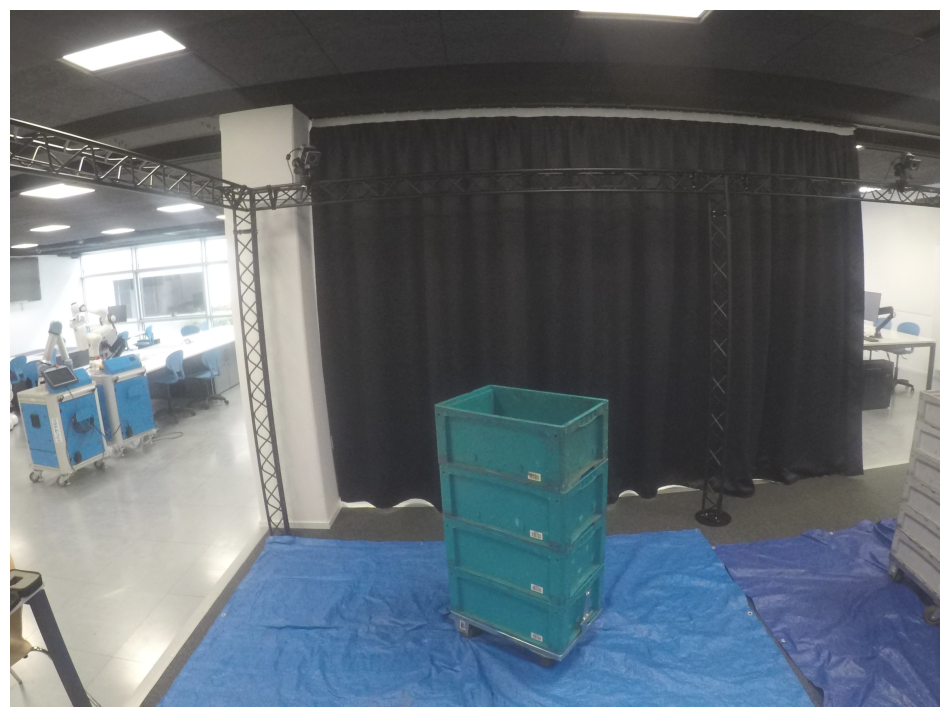

In [ ]:
random.seed(10)
transformed_img = transform(image=image)

plot_img(image)
plot_img(transformed_img["image"])

## Avec roboflow

In [89]:
import os
from roboflow import Roboflow
import albumentations as A
#from albumentations.pytorch import ToTensorV2
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

ImportError: cannot import name 'DetectionAnnotationVisualizer' from 'supervision' (/home/taylor/miniconda3/envs/sew/lib/python3.12/site-packages/supervision/__init__.py)

In [96]:
def plot_image_and_annotations(image, bboxes=None, class_names=None):
    fig, ax = plt.subplots()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    plt.axis('off')
  
    if (bboxes is not None):
        for class_id, x_center, y_center, w, h in bboxes:
            # Convert YOLO format to coordinates
            x_min = (x_center - w / 2) * image.shape[1]
            y_min = (y_center - h / 2) * image.shape[0]
            box_width = w * image.shape[1]
            box_height = h * image.shape[0]

            rect = patches.Rectangle((x_min, y_min), box_width, box_height, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            
            if class_names is not None:
                label = class_names[int(class_id)]
                plt.text(x_min, y_min - 2, label, color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.5))
  
    plt.show()

In [7]:
rf = Roboflow(api_key="Z4mFtu232oWID8Vtcntw")
project = rf.workspace("testsew").project("box-counting-dqcyf")
version = project.version(4)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


In [81]:
# Define augmentation pipeline
transform = A.Compose([
    A.RandomBrightnessContrast(p=0.2),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RGBShift(p=0.2),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomGamma(p=0.2),
    A.GaussianBlur(p=0.1),
    A.ToGray(p=0.1),
    A.ToSepia(p=0.1),
    #A.Normalize(),
    #ToTensorV2(),
], bbox_params=A.BboxParams(format='yolo', label_fields=["class_id"]))


Un fichier label a une première colonne correspondant à la classe et ensuite les coordonnées

In [94]:
def augment_data(image_path, label_path):
  image = cv2.imread(image_path)
  annotations = {"class_id" : [], "labels" : []}
  with open(label_path, 'r') as f:
      for line in f.readlines():
          class_id, x_center, y_center, W, H = map(float, line.strip().split())
          annotations["class_id"].append(int(class_id))
          annotations["labels"].append([x_center, y_center, W, H ])
  
  # Apply augmentation
  transformed = transform(image=image, bboxes = annotations["labels"], class_id = annotations["class_id"])
  transformed_img = transformed["image"]
  # Pour avoir la même structure de chaque ligne d'un fichier label
  transformed_bboxes = list(map(lambda x, y: (x, *y), transformed["class_id"], transformed['bboxes']))
  return transformed_img, transformed_bboxes

IMG20240408175947_jpg.rf.4427ec398dc763b631cbce570237bc74.jpg
[(2, 0.42968749999999994, 0.2609375, 0.10078124999999993, 0.19609375000000007), (2, 0.51171875, 0.26875, 0.11874999999999991, 0.19218750000000007), (2, 0.60078125, 0.27343749999999994, 0.12343749999999998, 0.18515625000000002), (3, 0.3296875, 0.7406249999999999, 0.09765625, 0.12734374999999998), (3, 0.41171874999999997, 0.73828125, 0.10312500000000002, 0.12109375), (3, 0.4749999999999999, 0.63984375, 0.11875000000000002, 0.09687499999999993), (3, 0.496875, 0.73515625, 0.09531250000000002, 0.09218749999999998), (3, 0.57109375, 0.6390625, 0.07578125000000002, 0.09062499999999996), (3, 0.63828125, 0.63203125, 0.0703125, 0.09296874999999993), (3, 0.64453125, 0.7195312500000001, 0.07968750000000002, 0.08281249999999996), (3, 0.5703125, 0.7289062499999999, 0.07421875, 0.09609374999999998), (1, 0.34765625000000006, 0.5164062500000001, 0.08671875000000007, 0.09296875000000004), (1, 0.45312499999999994, 0.428125, 0.08906249999999993,

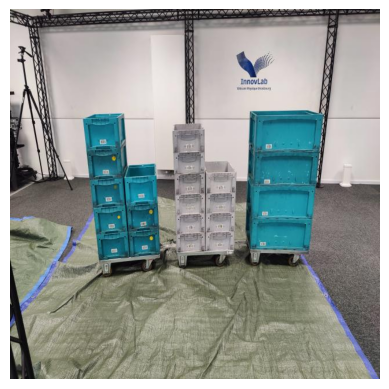

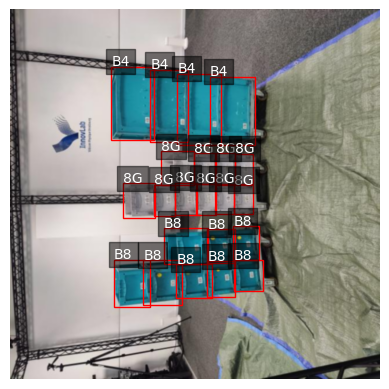

GOPR0557_JPG.rf.42081a043c598f3cd4f58b0626ef83e2.jpg
[(0, 0.53203125, 0.41875, 0.13906250000000003, 0.13124999999999998), (0, 0.53046875, 0.34140625, 0.13515625000000003, 0.13593750000000004), (0, 0.52734375, 0.2718749999999999, 0.13203124999999993, 0.14218750000000002), (0, 0.52109375, 0.2078125, 0.12578124999999996, 0.13984374999999993)]


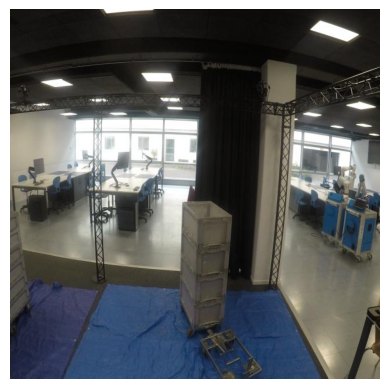

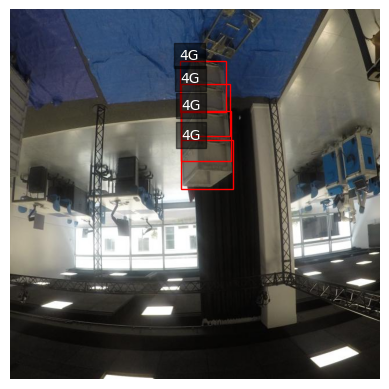

GOPR0559_JPG.rf.075996bbaf3566ebf4f1b32730189833.jpg
[(2, 0.5492187500000001, 0.5890625, 0.16562500000000002, 0.13203124999999993), (2, 0.54609375, 0.6984375, 0.15703125000000007, 0.09999999999999998), (2, 0.54765625, 0.83671875, 0.15625, 0.07734375000000004), (2, 0.5484375, 0.7703125, 0.16484374999999996, 0.08828124999999998)]


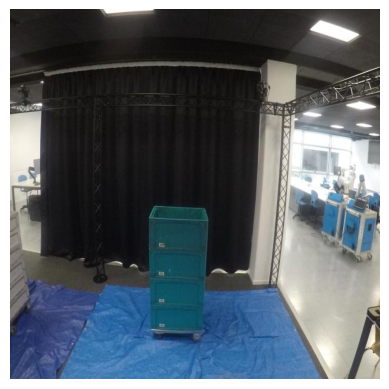

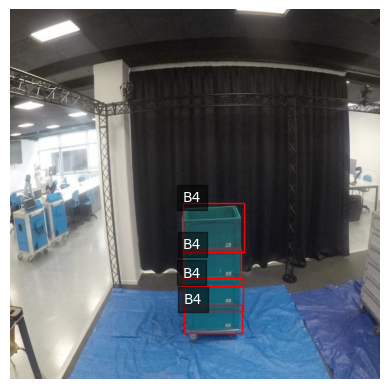

GOPR0550_JPG.rf.21927c91c4bb3fc555b009829145f11d.jpg
[(0, 0.284375, 0.6773437499999999, 0.16640624999999998, 0.20546874999999998), (0, 0.290625, 0.79453125, 0.15078125000000003, 0.19140625), (0, 0.29765625, 0.9109375, 0.16484375000000004, 0.12656250000000002), (0, 0.30546875, 0.946875, 0.140625, 0.10546875)]


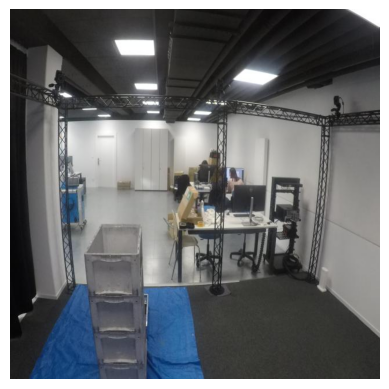

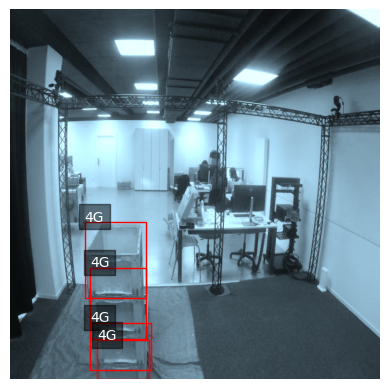

GOPR0575_JPG.rf.775ec6c4eefbfeb7fcd7ddfe96f139f4.jpg
[(2, 0.546875, 0.32109375, 0.08437499999999998, 0.14218750000000002), (2, 0.62109375, 0.32421875, 0.06874999999999998, 0.14921874999999998), (2, 0.6859375000000001, 0.328125, 0.06406250000000002, 0.14296875000000003), (2, 0.75234375, 0.33281249999999996, 0.07734375000000004, 0.14140625)]


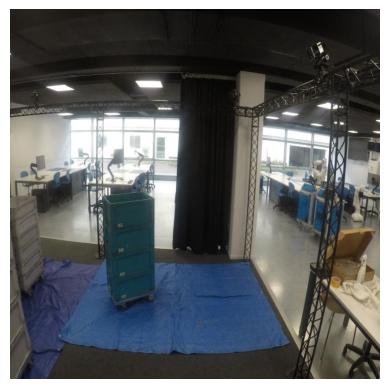

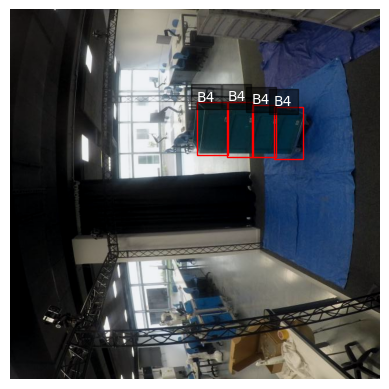

GOPR0549_JPG.rf.48fe3b5b0335f841c7abb709d9ea1b12.jpg
[(0, 0.3609375000000001, 0.20546875000000003, 0.16640624999999998, 0.21328124999999998), (0, 0.2632812500000001, 0.21406250000000004, 0.15078124999999998, 0.21484375), (0, 0.17578124999999994, 0.22265625, 0.15000000000000002, 0.19999999999999996), (0, 0.09921874999999997, 0.2296875, 0.15781250000000002, 0.19296875000000002)]


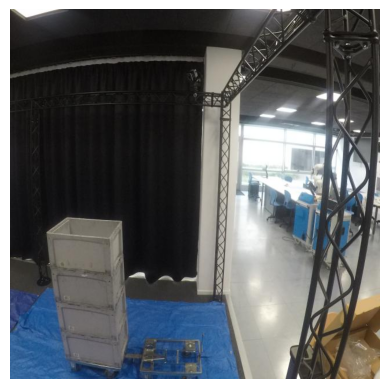

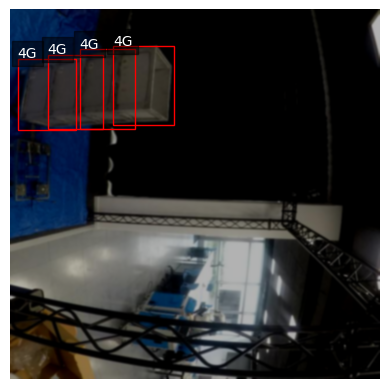

GOPR0572_JPG.rf.e1a5583b6de4ca6bde065ef8c7c6fb5e.jpg
[(2, 0.9375, 0.43437499999999996, 0.12421875000000004, 0.10234374999999996), (2, 0.934375, 0.34921875, 0.13124999999999998, 0.07421875), (2, 0.93125, 0.27734375, 0.13671875, 0.07734375000000004), (2, 0.9242187500000001, 0.21796875, 0.15078124999999998, 0.07578125000000002)]


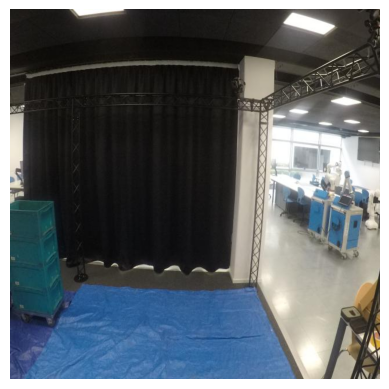

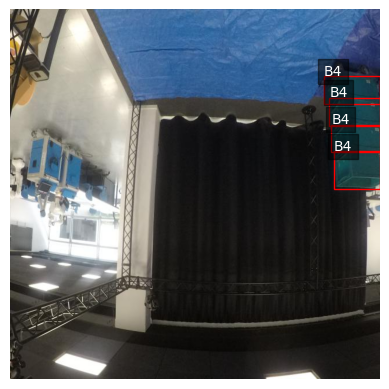

In [97]:
# Augmentation des données que des images d'entraînement
download_path = "Box-Counting-4"
dir_path = os.path.join(download_path, "test")



# Attention à l'arborescence : train -> images
#                              train -> labels
path_to_images = os.path.join(dir_path, "images")
path_to_labels = os.path.join(dir_path, "labels")

for file in os.listdir(path_to_images):
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
        print(file)
        image_path = os.path.join(path_to_images, file)
        bbox_path = os.path.join(path_to_labels, file[:-3] + "txt")

        transformed_img, transformed_bboxes = augment_data(image_path, bbox_path)
        print(transformed_bboxes)
        img = cv2.imread(image_path)
        plot_image_and_annotations(img)
        plot_image_and_annotations(transformed_img, transformed_bboxes, ["4G", "8G", "B4", "B8"])
        

        # Save augmented image
        #augmented_image_name = os.path.splitext(image_file)[0] + "_augmented.jpg"
        #cv2.imwrite(os.path.join(images_path, augmented_image_name), augmented_image)

